## Importando bibliotecas úteis

In [46]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

A biblioteca **sklearn** possui várias ferramentas para aprendizado de máquina e mineração de dados.

Iremos utilizar o **KNNImputer** que irá imputar valores utilizando KNN

Também utilizaremos o **MinMaxScaler** que fará a normalização minmax (necessária para um uso adequado do KNNImputer)


#Introdução

Nesse python notebook iremos simular uma base de dados com valores faltantes e iremos visitar alguns métodos úteis para execturar a imputação de dados

Veremos os seguintes tópicos:


*   Remoção artificial de células usando np.nan e pandas
*   Contagem de valores faltantes na base de dados
*   Plots com valores faltantes para entendimento da base
*   Escrita e Leitura de arquivo CSV com valores faltantes
*   Imputação por valor fixo (média, moda, aleatório, 1000)
*   Normalização (minmax) da base de dados
*   Imputação por vizinhança, usando KNN
*   Remoção de amostras com valores faltantes




## Carregando base e removendo células aleatórias, exceto da última coluna

### Removendo 30% da base de dados (exceto rótulos)

**Nesse bloco:**

*   np.nan
*   usando pandas.DataFrame.info() para verificar a existência de valores nulos



In [74]:
#Carregando Iris
iris = sns.load_dataset('iris')

np.random.seed(42)  #Definindo seed do random para replicabilidade

#Removendo valores
removidos = set()
porcentagem = 0.30 #Porcentagem (0~1) das células a serem removidas
qtdCelulas = len(iris)*(len(iris.columns)-1) #Quantidade de células na base de dados, ignorando a última coluna

for i in range(int(np.ceil(porcentagem*qtdCelulas))):
  linha = np.random.randint(0, len(iris))
  coluna = np.random.randint(0, len(iris.columns)-1) ##Não removo valores da coluna de rótulos
  while (linha, coluna) in removidos:
    linha = np.random.randint(0, len(iris))
    coluna = np.random.randint(0, len(iris.columns)-1) ##Não removo valores da coluna de rótulos

  iris.iloc[linha, coluna] = np.nan
  removidos.add((linha,coluna))

iris.info()
print("\n\nForam removidas ",str(len(removidos)), "células das ",str(qtdCelulas))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  110 non-null    float64
 1   sepal_width   107 non-null    float64
 2   petal_length  109 non-null    float64
 3   petal_width   94 non-null     float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Foram removidas  180 células das  600


Podemos ver pelo info acima que:

1.  A coluna sepal_length possui apenas 110 valores não-nulos, ou seja temos 40 valores nulos nessa coluna
2.  A coluna sepal_width possui apenas 107 valores não-nulos, ou seja temos 43 valores nulos nessa coluna
3. **Exercício:** Quantos valores nulos estão presentes nas outras duas colunas?



### Visualizando Base de Dados

**Nesse bloco:**

*   header do dataframe após remoção de valores
*   pairplot para visualizar os dados
*   exercícios

Como podemos ver abaixo, escolhemos um valor especial (np.nan) para os valores faltantes. Esse mesmo valor será obtido ao carregar um CSV usando o pandas.

nan é uma sigla para 'not a number' indicando que o valor não é um número, geralmente esse valor está a associado à valores faltantes ou operações algébricas indefinidas (e.g. 0/0, 0^0, etc.)

In [75]:
print(np.nan)
iris.head()

nan


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa


Iremos gerar pairplots, notem que a quantidade de amostras pode variar. Em cada plot são mostradas apenas as amostras com todos os atributos disponíveis

**Exercício:** Aumentar drasticamente (e.g. 50%, 75%, 90%, 95%) a quantidade de itens removidos e ver as diferenças nos plots

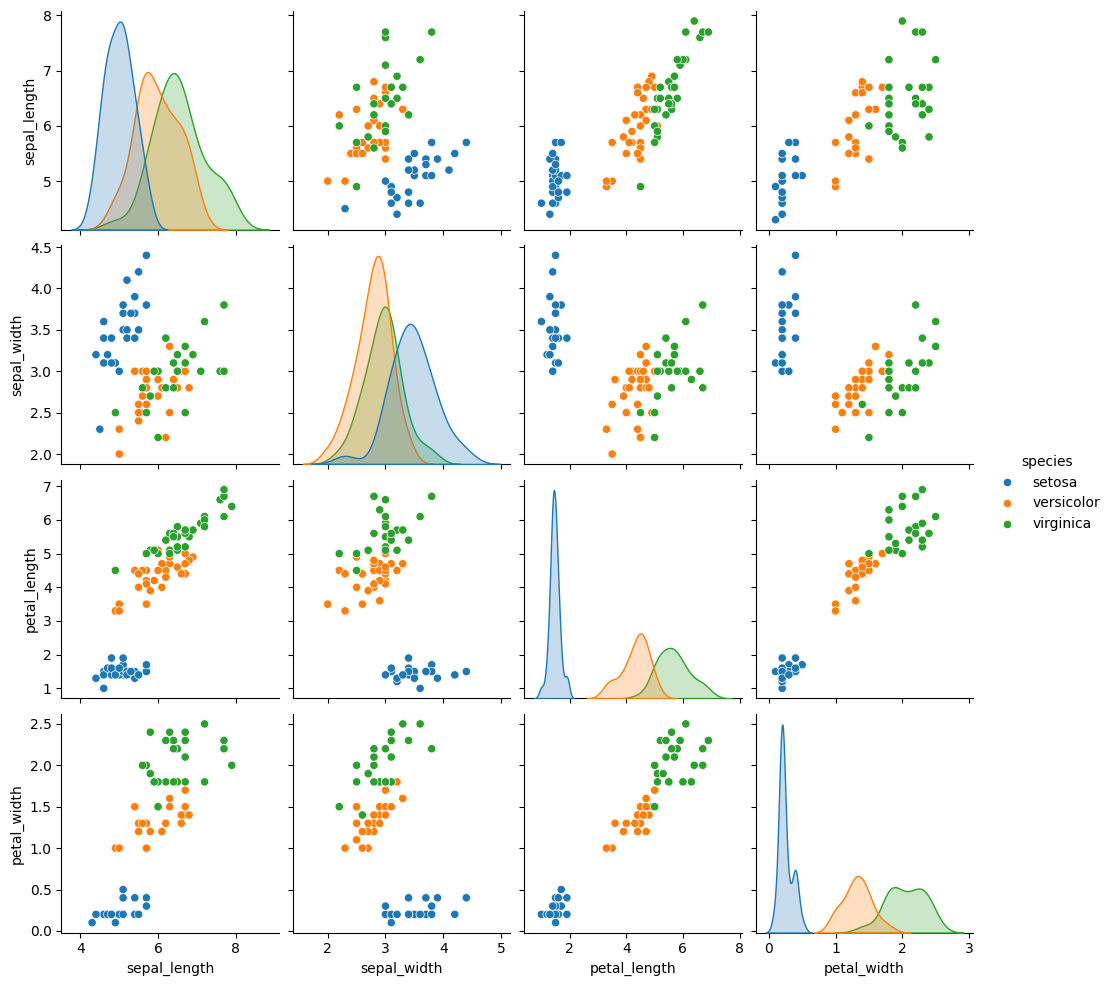

In [76]:
# Visualizando por pairplots
sns.pairplot(iris, hue='species', diag_kind='kde')

**Exercício:** Que outros gráficos podem ser interessantes? Analisar os dados utilizando ferramentas gráficas conhecidas (tem outliers? Tem alguma coluna com muitos valores faltantes? Tem amostras descritas por poucas variáveis?)


### Escrita e Leitura de CSVs com valores faltantes

Esse bloco está aqui apenas para referência e estudo. Uma vez que em aplicações reais provavelmente os dados serão lidos de um arquivo ou banco de dados.

Não utilizaremos as variáveis geradas nesse bloco

**Nesse bloco:**

*  Uso de pd.read_csv() e pd.to_csv() para dataframes com valores faltantes

O comando abaixo salva os dados do dataframe **iris** em um csv chamado iris_na.csv

Além do local onde será salvo o arquivo, indicamos que ele **não armazene os índices (index=False)**, também indicamos que queremos **salvar os nomes das colunas**, i.e. cabeçalho **(header=True)** e que os **valores faltantes** serão representados no csv pelo caractere '?'  **(na_rep='?')**


**Exercício:** descomentar outras linhas e ver o impacto desses parãmetros no arquivo .csv (usando bloco de notas ou notepad++)

In [81]:
iris.to_csv("iris_na.csv", index=False, header=True,  na_rep='?')
#iris.to_csv("iris_naAltA.csv", index=True, na_rep='?')
#iris.to_csv("iris_naAltB.csv", index=False, na_rep='|')
#iris.to_csv("iris_naAltC.csv", index=False, na_rep=',')  # Exercicio ninja: por que funciona?
#iris.to_csv("iris_naAltD.csv", index=False, header=False,  na_rep='?')

Abaixo carregamos o arquivo csv, entendendo os caracteres referentes à valores nulos e a existência de cabeçalhos e índices

**Exercícios:** Ler todos os arquivos gerados no bloco anterior corretamente. Será necessário entender o funcionamento do parâmetro header e também procurar e entender um novo parâmetro *index_col*

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [84]:
iris_na = pd.read_csv("iris_na.csv", header=0, na_values='?')
iris_na.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa


### Imputando valores fixos

**Nesse bloco:**


*   Substituir valores faltantes por valor arbitrário (9999)
*   Substituir valores faltantes por valores arbitrários diferentes em cada coluna (6666,7777,8888,9999)
*   Substituição por média, moda ou mediana globais da coluna
*   Substituição por média, moda ou mediana **filtrando por rótulo**
* Exercícios



In [86]:
#'Salvando' iris antes das modificações para comparação
irisOriginalNa = iris.copy()

### Imputando valor arbitrário

O comando df.fillna(valor, inplace=True|False) altera todos os os np.nan do dataframe *df* por *valor*

O parâmetro inplace, se True indica que as mudanças são feitas na própria variável *df*, caso False, retorna um novo dataframe alterado, sem mudar *df*

**Exercício:**
* Alterem o valor usado no fillna
* Alterem o inplace para true e imprimam iris

In [93]:
iris = irisOriginalNa.copy()

irisAll9999 = iris.fillna(9999, inplace=False)
irisAll9999.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,9999.0,3.0,1.4,0.2,setosa
2,4.7,3.2,9999.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,9999.0,1.4,0.2,setosa


### Plots do desastre

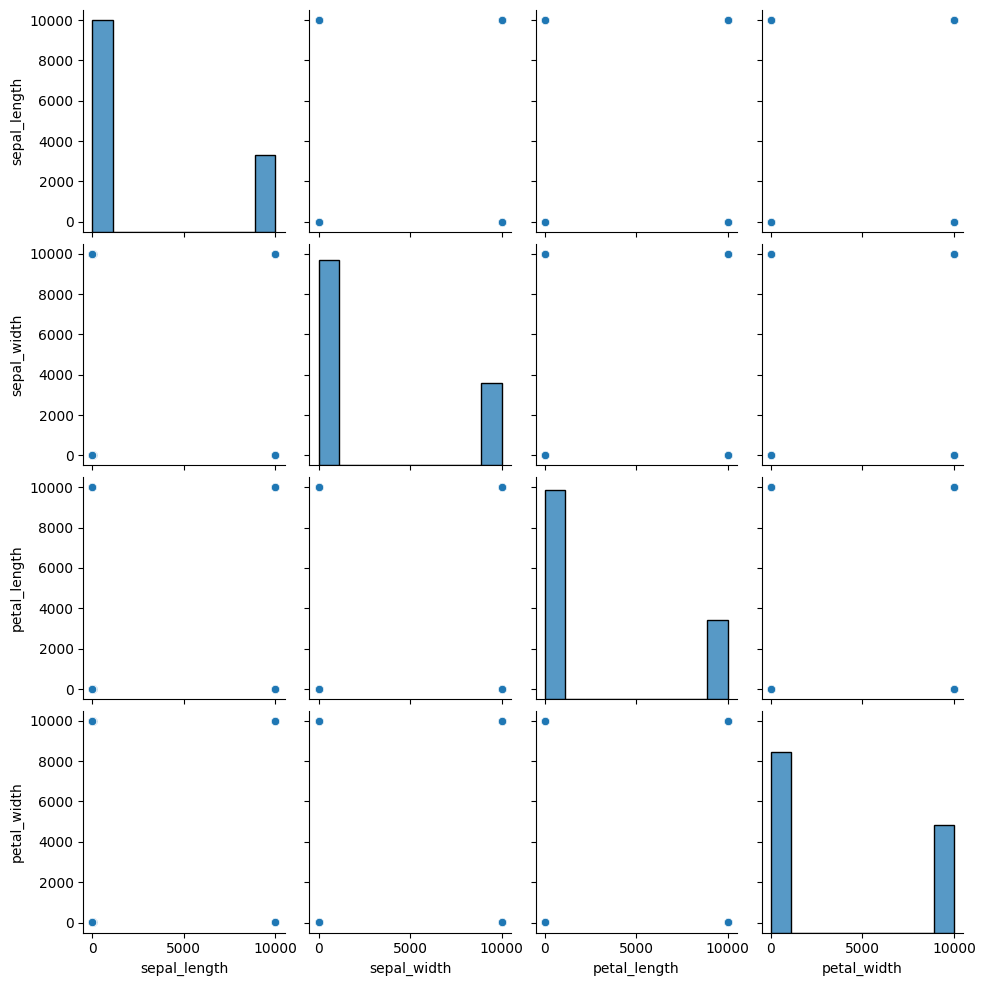

In [92]:
sns.pairplot(irisAll9999)

**Exercício ninja:** plotar o violin plot para os outros atributos

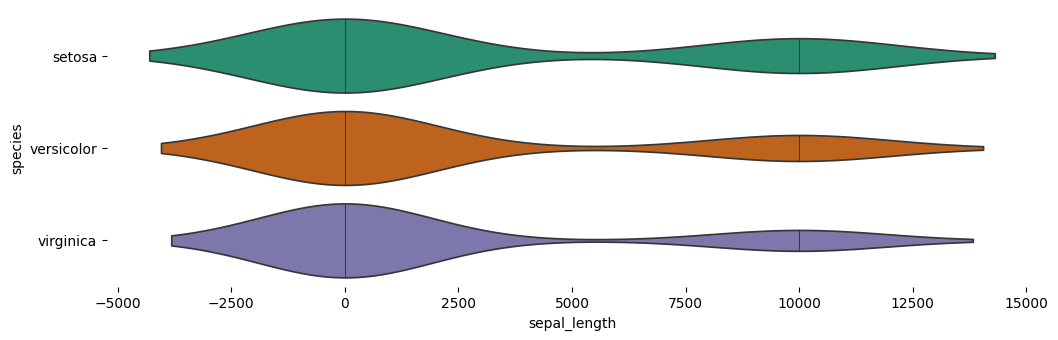

In [91]:
from matplotlib import pyplot as plt
figsize = (12, 1.2 * len(irisAll9999['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(irisAll9999, x='sepal_length', y='species', inner='stick', hue='species', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Valores arbitrários por coluna

Podemos passar apenas uma coluna (ou uma **lista** de colunas) ao chamar fillna. As alterações serão feitas apenas na(s) coluna(s) escolhidas

**Exercícios:**
* Usar um laço (e.g. for) para evitar escrever uma linha para cada coluna
* Alterar valores a serem imputados em cada coluna

In [97]:
iris = irisOriginalNa.copy()

iris['sepal_length'].fillna(6666, inplace=True)
iris['sepal_width'].fillna(7777, inplace=True)
iris['petal_length'].fillna(8888, inplace=True)
iris['petal_width'].fillna(9999, inplace=True)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,6666.0,3.0,1.4,0.2,setosa
2,4.7,3.2,8888.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,7777.0,1.4,0.2,setosa


#### Mais plots terríveis

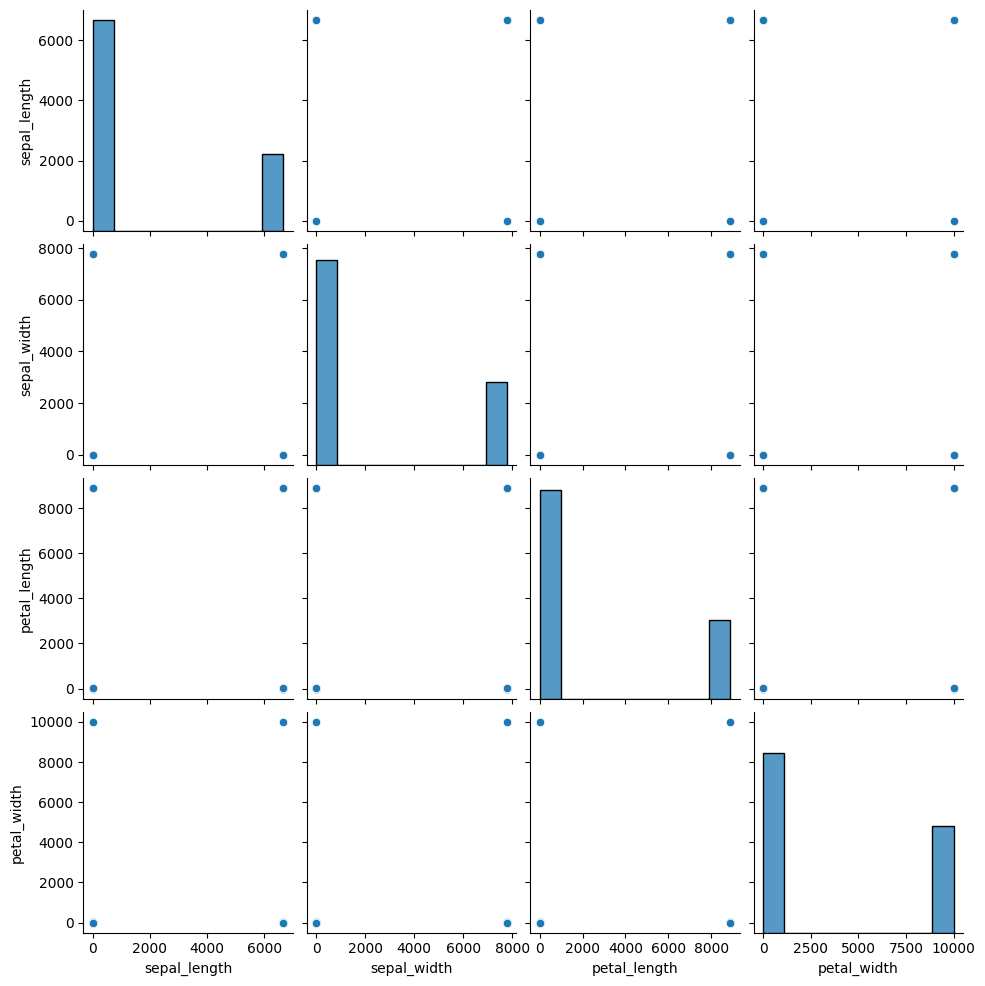

In [95]:
sns.pairplot(iris)

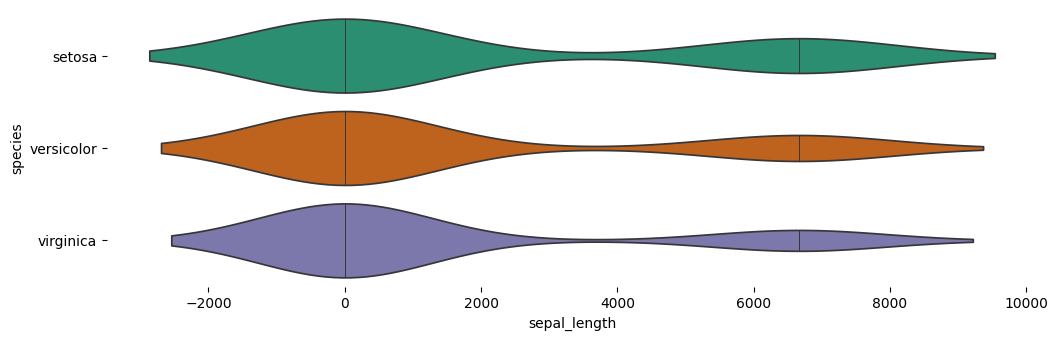

In [96]:
from matplotlib import pyplot as plt
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='sepal_length', y='species', inner='stick', hue='species', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Imputando valores fixos, mas menos arbitrários

Podemos usar medidas de centralidade como média, mediana e moda para imputar valores

In [110]:
#Copiando irisOriginalNa
irisMedia = irisOriginalNa.copy()
irisMediana = irisOriginalNa.copy()
irisModa = irisOriginalNa.copy()

A célula abaixo irá dar erro. Exercício ler o erro e entender o problema antes de passar para o próximo bloco. (Dica: o colab tem um botão de 'Explain Error' bem conveniente)

In [111]:
#calculando média de todas as colunas

media = irisOriginalNa.mean()
media

TypeError: Could not convert ['setosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosaversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorvirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginica'] to numeric

A célula acima gerou erro pois não é possível calcular a média da coluna de rótulos (tipo string).

In [112]:
#calculando média de todas as colunas, exceto última coluna
colunasSemRotulo = list(iris.columns)
colunasSemRotulo.remove('species')
colunasSemRotulo

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [113]:
media = irisOriginalNa[colunasSemRotulo].mean()
media

sepal_length    5.875455
sepal_width     3.061682
petal_length    3.769725
petal_width     1.210638
dtype: float64

A execução do bloco acima é bem conveniente, **pois ele calula a média já coluna a coluna**. Temos as médias de **cada** coluna

Temos a média de sepal_length = 5.88 e assim por diante

Pandas é bem inteligente na forma como ele lida com esse tipo de estrutura. Notem que o nome da coluna está **associado** ao valor da média dele. Vamos usar isso a nosso favor

Quando passamos uma estrutura com nomes de colunas e valores e essas colunas existem no dataframe, o pandas já entende que deve fazer o processo coluna a coluna, vejam como os NAs das linhas 1,2 e 4 foram substituídos pelas médias das colunas sepal_length, petal_length e sepalwidth (respectivamente)

In [115]:
irisMedia.fillna(media, inplace=True)
irisMedia.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.2,setosa
1,5.875455,3.000000,1.400000,0.2,setosa
2,4.700000,3.200000,3.769725,0.2,setosa
3,4.600000,3.100000,1.500000,0.2,setosa
4,5.000000,3.061682,1.400000,0.2,setosa


#### Plots bem mais legais mas...

Vamos notar que temos uma alta incidência de valores repetidos, o que fica evidente nos histogramas.

Vejam também a mudança nos histogramas, em especial da iris setosa (azul), vejam como uma distribuição que deveria ser normal acabou se tornando 'bi-modal' em vários atributos

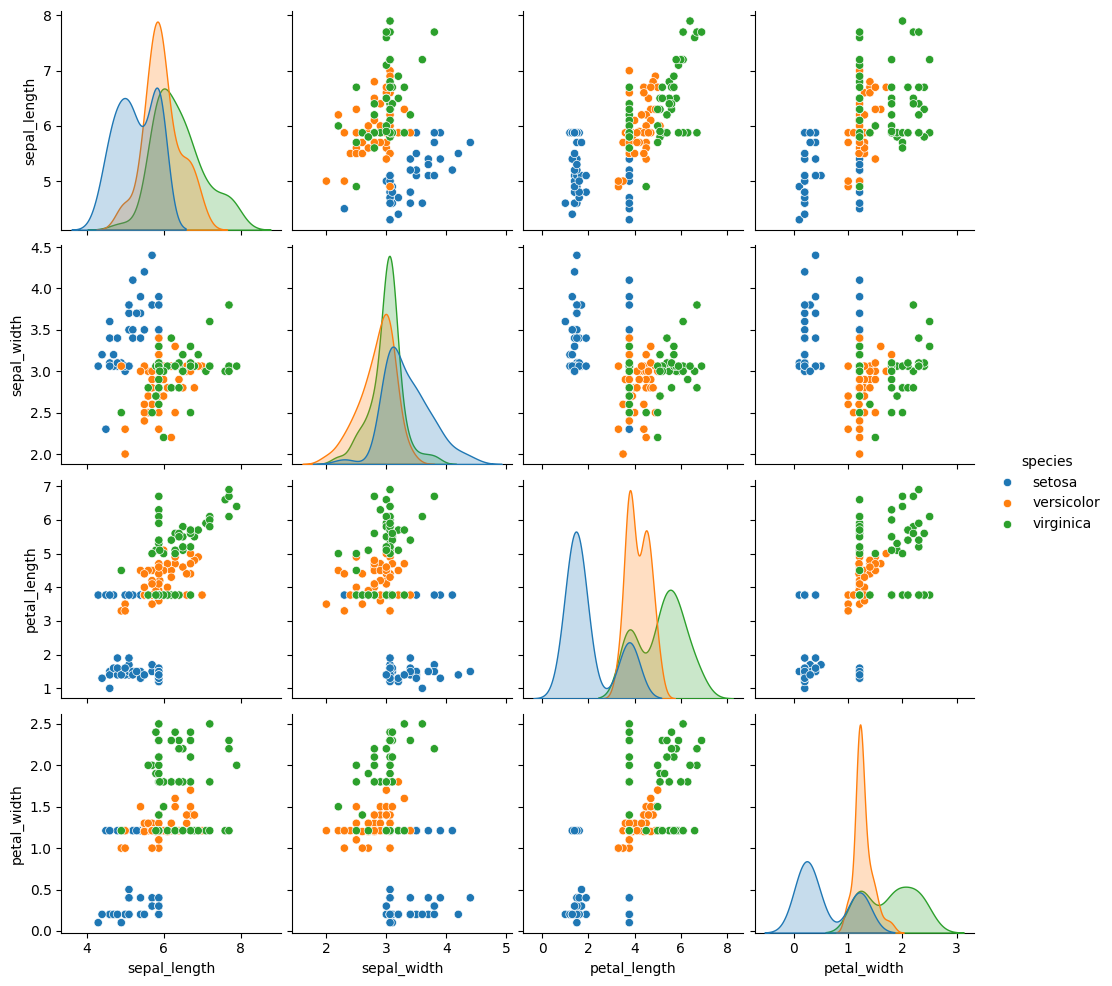

In [118]:
sns.pairplot(irisMedia, hue='species')

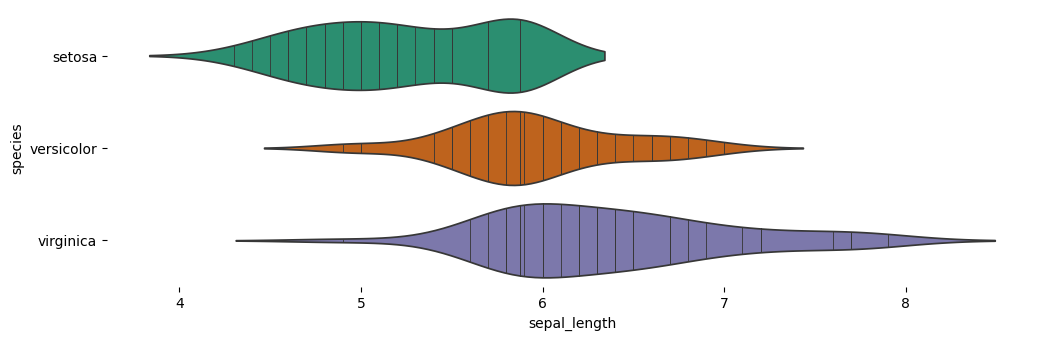

In [117]:
from matplotlib import pyplot as plt
figsize = (12, 1.2 * len(irisMedia['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(irisMedia, x='sepal_length', y='species', inner='stick', hue='species', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### **Exercício:**

* Usando os blocos abaixo que calculam as medianas, imputar coluna a coluna usando mediana

* Plotar pairplot e violinplot dos dataframes gerados
* Os problemas causados pela alta repetição de valores e falta de filtro se mantiveram?

In [121]:
medianas = irisOriginalNa[colunasSemRotulo].median()
medianas

sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

In [ ]:
### EXERCICIO Imputando valores usando medianas

In [ ]:
### EXERCICIO Plotando pairplot

In [ ]:
### EXERCICIO Plotando violinplot

In [ ]:
### EXERCICIO Os problemas se mantiveram???

### Resposta:

#### Calculando Moda

Notem que temos dados contínuos, logo não existe (provavelmente) um valor mais comum, e mesmo sendo o mais comum, não reflete o que queremos encontrar.

Precisaremos fazer um binning nos dados para então calcular a moda

In [188]:
iris = irisOriginalNa.copy()
bins=dict()
qtdBins=50

for col in iris.columns:
  if col != 'species':
    bins[col] = np.linspace(iris[col].min(), iris[col].max()+1, qtdBins)
    iris[col] = pd.cut(iris[col], len(bins[col]), labels=bins[col])

In [194]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.332653,4.151020,1.422449,0.238776,setosa
1,NaN,3.387755,1.422449,0.238776,setosa
2,4.769388,3.665306,NaN,0.238776,setosa
3,4.675510,3.526531,1.563265,0.238776,setosa
4,5.144898,NaN,1.422449,0.238776,setosa


#### Plots após binning

Agora podemos calcular a moda

**Exercício:** Alterar a quantidade de bins e verificar o comportamento da base de dados

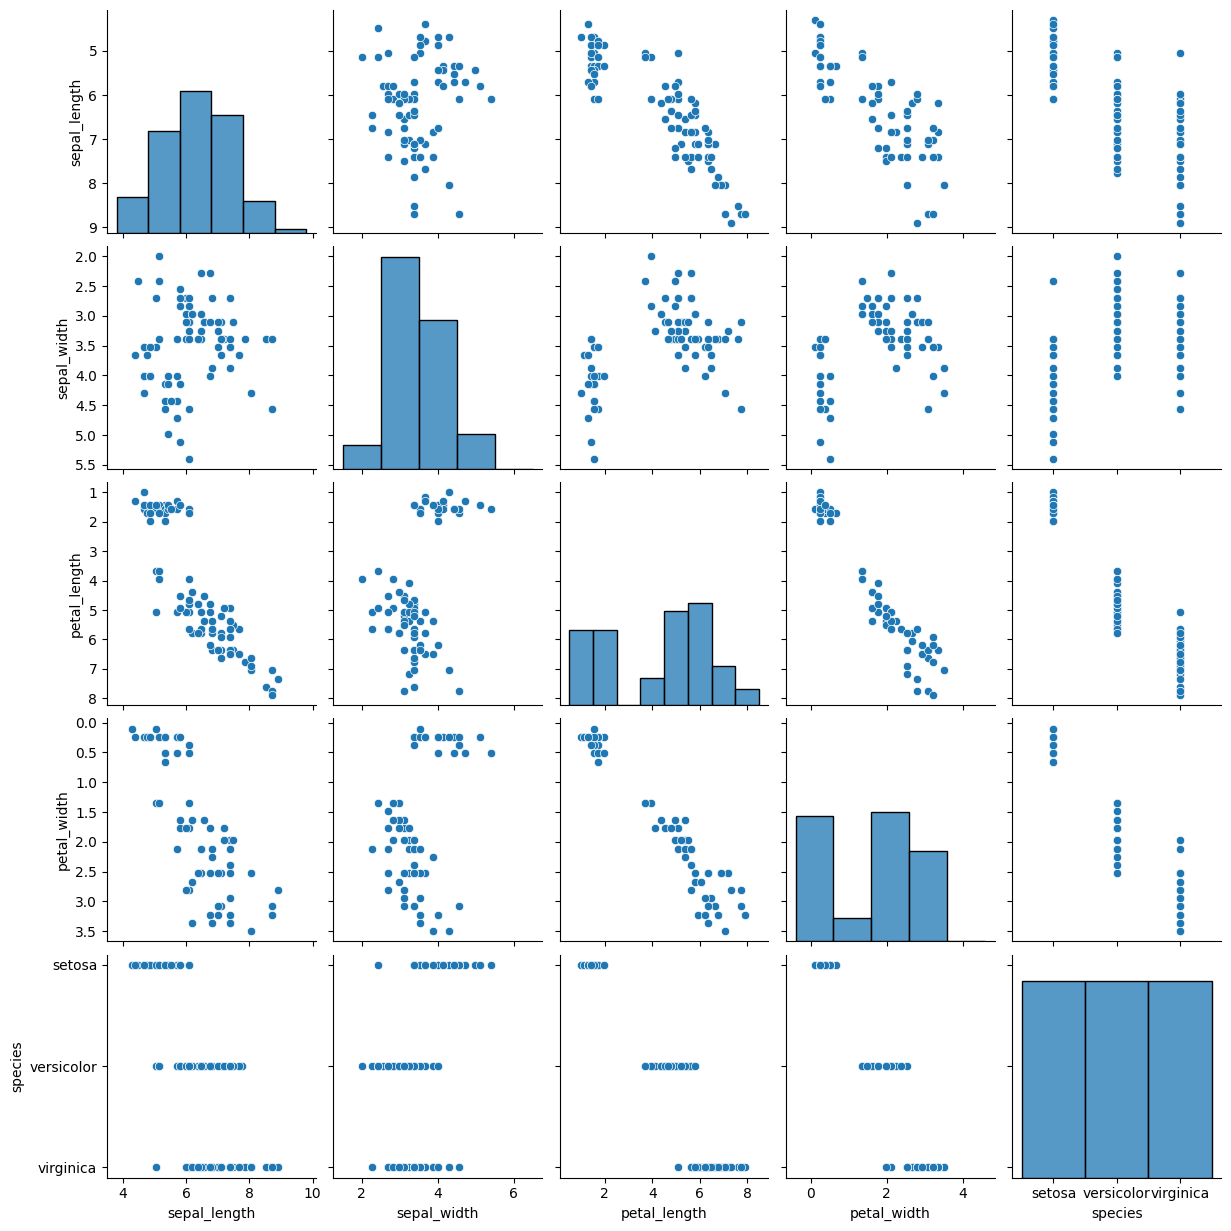

In [208]:
#sns.pairplot(iris, vars=iris.columns, hue='species', kind='hist')
sns.pairplot(iris, vars=iris.columns) ## Por puro caos precisei passar as colunas explicitamente com o parâmetro vars

#### Calculando valores de moda

O dataFrame.describe() mostra várias informações sobre a estatística do dataframe, média, mínimos e máximos

**Exercício:**
* ver o describe do irisOriginalNa. Haverão informações de mínimo, desvio padrão, média, etc..

* Usar o describe para extrair a média, ao invés de usar o método que vimos anteriormente

In [216]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,110.000000,107.000000,109.000000,94.000000,150
unique,33.000000,22.000000,35.000000,21.000000,3
top,7.397959,3.387755,1.422449,0.238776,setosa
freq,8.000000,19.000000,12.000000,21.000000,50


O describe retorna várias informações, uma em cada linha. Como só temos variáveis contáveis (já que fizemos o binning) ele está mostrando:
* **top:** valor mais frequente
* **freq:** quantidade de ocorrências do valor mais frequente

Iremos ler a linha top, usando o loc (atentem-se aos **colchetes**). Podemos notar que a estrutura retornada é similar à que vimos anteriomente no calculo da média, iremos usá-la da mesma maneira

In [219]:
top = iris.describe().loc['top']
top

sepal_length    7.397959
sepal_width     3.387755
petal_length    1.422449
petal_width     0.238776
species           setosa
Name: top, dtype: object

In [220]:
irisModa.fillna(top, inplace=True)
irisModa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.2,setosa
1,7.397959,3.000000,1.400000,0.2,setosa
2,4.700000,3.200000,1.422449,0.2,setosa
3,4.600000,3.100000,1.500000,0.2,setosa
4,5.000000,3.387755,1.400000,0.2,setosa


#### Plotando imputação pela Moda

Vemos que ela também distorce muito os dados, pois estamos ignorando as características locais da base de dados

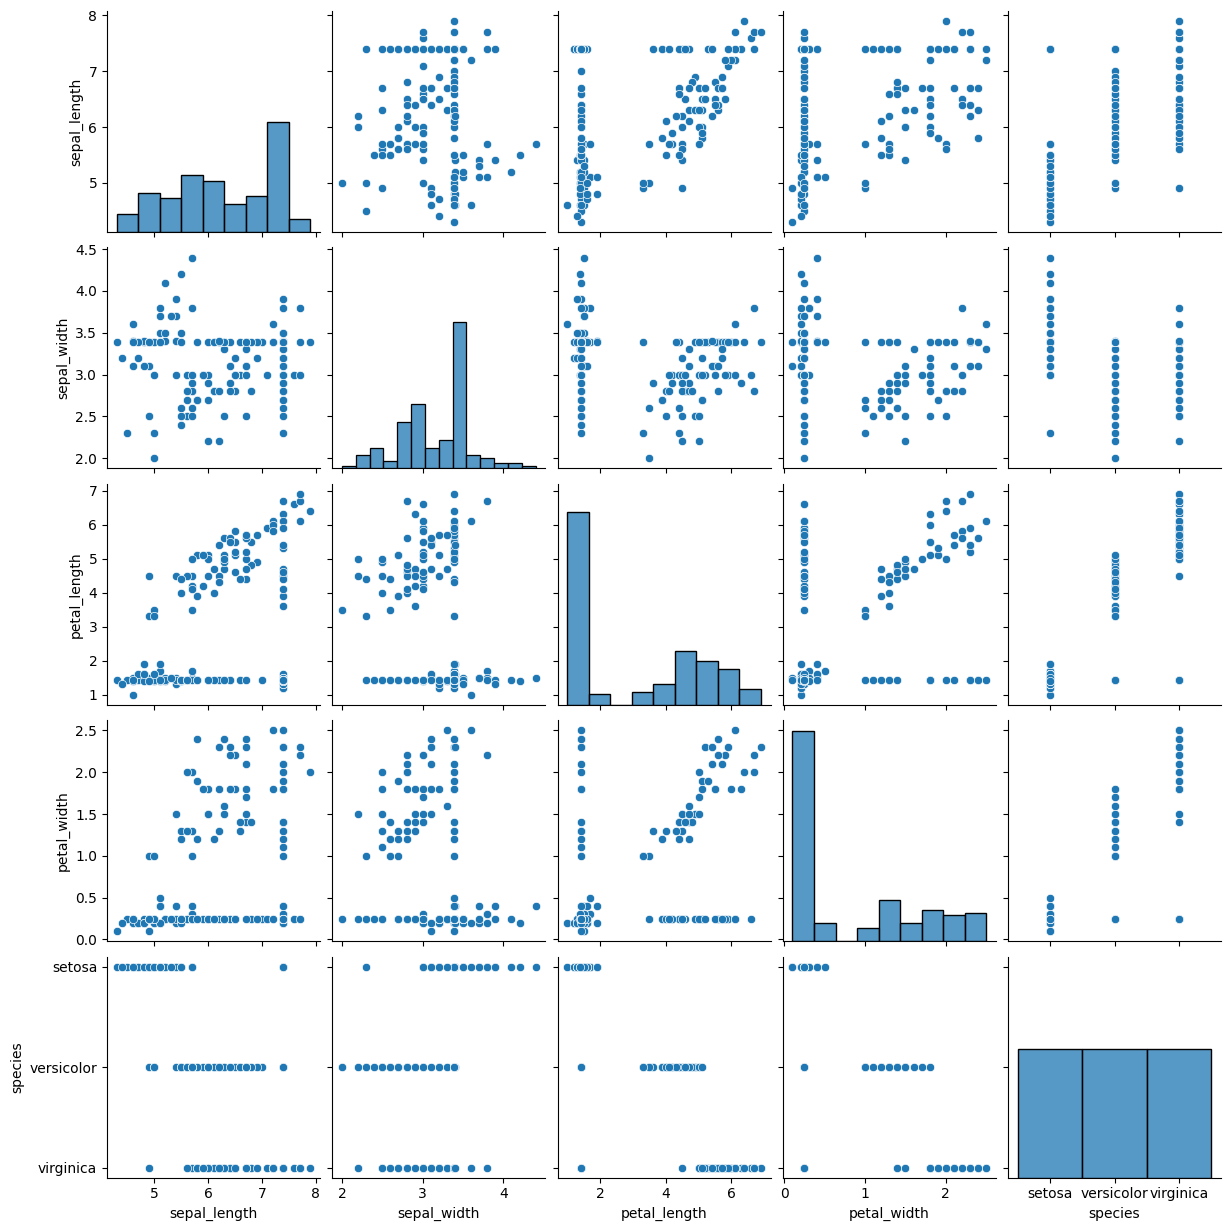

In [222]:
sns.pairplot(irisModa)

### Imputando valores que dependem do **rótulo**

Para isso utilizaremos **filtros**, atualizaremos nans olhando apenas para **um rótulo de cada vez**

Notem que mudanças feitas em iris[filtro['virginica']] afetarão a variável iris diretamente, não estou fazendo cópias

**OBS e exercício:** Poderia ter feito um laço para fazer um filtro para cada classe, adaptar o código abaixo para que funcione em um laço (e.g. for)

In [235]:
iris = irisOriginalNa.copy()

filtro = dict()

filtro['setosa'] = iris['species'] == 'setosa'
#iris[filtro['setosa']]

filtro['versicolor'] = iris['species'] == 'versicolor'
#iris[filtro['versicolor']]

filtro['virginica'] = iris['species'] == 'virginica'
iris[filtro['virginica']]

,sepal_length,sepal_width,petal_length,petal_width,species
100,NaN,3.3,NaN,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,NaN,virginica
103,6.3,NaN,5.6,NaN,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,NaN,virginica
106,4.9,2.5,4.5,NaN,virginica
107,NaN,2.9,6.3,1.8,virginica
108,6.7,2.5,NaN,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


Encontrando valor médio de cada coluna, **filtrando por rótulo**

In [236]:
medias = iris[filtro['setosa']][colunasSemRotulo].mean()
medias

sepal_length    5.000000
sepal_width     3.468571
petal_length    1.463158
petal_width     0.248485
dtype: float64

Notem na célula anterior como estamos aolhando apenas para a versão filtrada na hora de calcular as médias. O resultado da função é algo coluna a coluna como vimos anteriormente.

**Exercício:** Alterar filtro no bloco anterior para mostrar médias da espécie versicolor e virgínica

**Detalhes:** usar inplace=True gerará warnings e não fará o que queremos, pois iris[filtro[r]] é um recorte da base iris, é necessário fazer atribuição

In [240]:
rotulos = ['setosa', 'virginica','versicolor']
for r in rotulos:
  medias = iris[filtro[r]][colunasSemRotulo].mean()
  iris[filtro[r]] = iris[filtro[r]].fillna(medias, inplace=False) #O fillna irá substituir nans apenas nas colunas presentes em medias

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.500000,1.400000,0.2,setosa
1,5.0,3.000000,1.400000,0.2,setosa
2,4.7,3.200000,1.463158,0.2,setosa
3,4.6,3.100000,1.500000,0.2,setosa
4,5.0,3.468571,1.400000,0.2,setosa


#### Plotando

Podemos notar que houve um aumento nos valores médios (basta ver que o centro das distribuições ficou mais fino e alto). Mas a distribuição está bem menos perturbada que antes

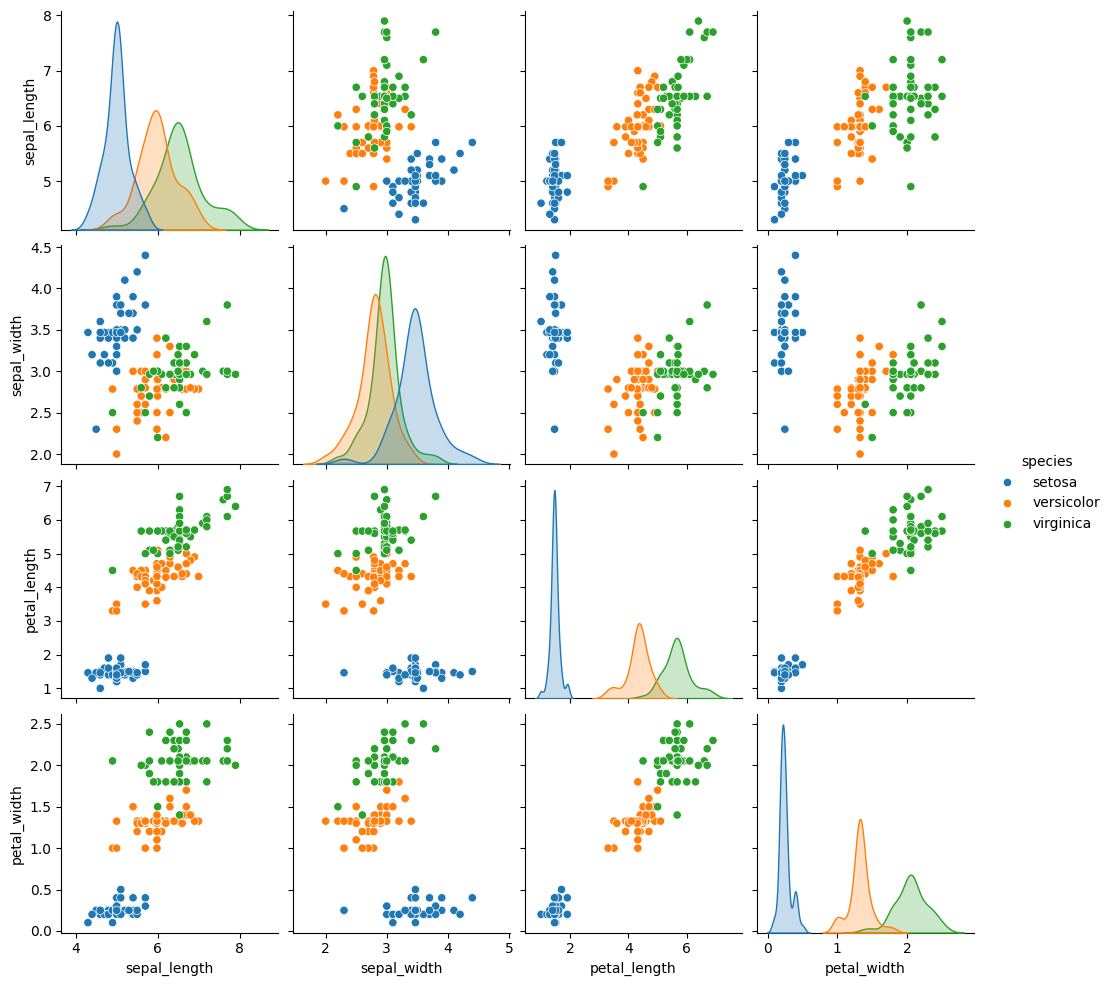

In [241]:
sns.pairplot(iris, hue='species')

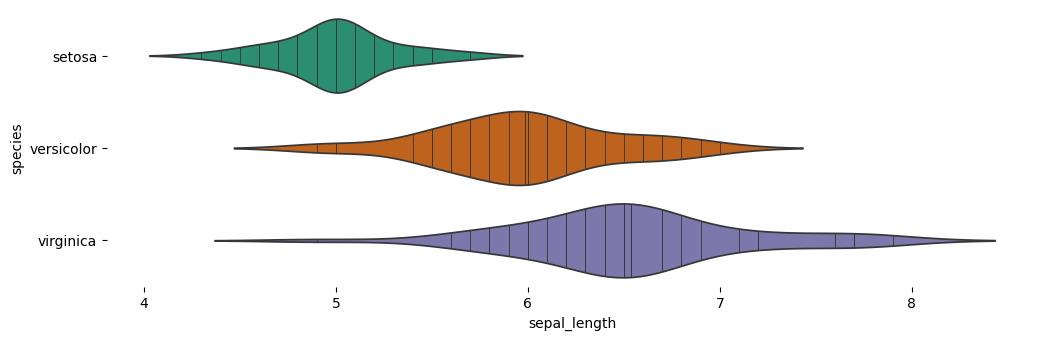

In [244]:
from matplotlib import pyplot as plt
figsize = (12, 1.2 * len(iris['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris, x='sepal_length', y='species', inner='stick', hue='species', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Imputando valores por vizinhança

Para ter uma imputação que 'se espalhe' melhor pela distribuição das classes, evitando colocar o mesmo valor para muitas amostras

**Nesse bloco:**
* Usando KNNImputer para imputar valores
* Exercícios

A estrutura de código usada no KNN Imputer e no MinMaxScaler é bem similar e é utilizada em **vários algoritmos** em python

In [261]:
iris = irisOriginalNa.copy()

#Criaremos um objeto MinMaxScaler que chamaremos de scaler
#Podemos pensar nesse objeto (pensem como um tipo abstrado de dados ou um objeto de fato (orientação a objetos))
  # como uma variável especial que irá guardar todas as informações necessárias para fazer uma normalização minmax
  # ele permitirá aprender (fit) os mínimos e máximos
  # e também transformar (transform) os dados usando os valores de mínimo e máximo aprendidos
scaler = MinMaxScaler()

#Precisamos que o scaler aprenda os valores de mínimo e máximo a serem usados para calcular os valores de normalização.
#Para isso usamos o método fit() do scaler, e passamos o dataframe que queremos
scaler.fit(iris[colunasSemRotulo])

#Para modificar os dados utilizamos o método transform() e passamos o dataframe que queremos transformar
#Notem que scaler já sabe a fórmula a ser aplicada, pois fizemos scaler.fit()
irisNorm = scaler.transform(iris[colunasSemRotulo])

irisNorm[:5] ##.head() não vai funcionar, mostrando as 5 primeiras linhas

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [       nan, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       ,        nan, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444,        nan, 0.06779661, 0.04166667]])

Temos dois problemas por enquanto.


1.   Não temos a coluna de rótulos (pois não é numérica e não pode ser normalizada)
2.   irisNorm é um np.array e não um dataframe



In [262]:
#print(colunasSenRotulo)
#Transformando irisNorm em um dataframe chamado irisDFNorm
#Passamos os dados (irisNorm) e indicamos os nomes das colunas (columns=)
irisDFnorm = pd.DataFrame(irisNorm, columns=colunasSemRotulo)

#O código acima irá criar um dataframe usando os valores em irisNorm, sabendo que cada dado é de uma coluna, e com os nomes das colunas
irisDFnorm

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,NaN,0.416667,0.067797,0.041667
2,0.111111,0.500000,NaN,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,NaN,0.067797,0.041667
...,...,...,...,...
145,0.666667,NaN,0.711864,0.916667
146,0.555556,NaN,0.677966,NaN
147,0.611111,0.416667,0.711864,NaN
148,0.527778,0.583333,0.745763,0.916667


In [263]:
#Ainda precisamos adicionar a coluna de rótulos
#Basta dizer que a nova coluna recebe os valores de outra
irisDFnorm['species'] = iris['species']
irisDFnorm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,NaN,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,NaN,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,NaN,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,NaN,0.711864,0.916667,virginica
146,0.555556,NaN,0.677966,NaN,virginica
147,0.611111,0.416667,0.711864,NaN,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


Finalmente podemos aplicar o KNNImputer, lembrem que fizemos a etapa de normalização pois o KNN faz comparações de distância entre amostras e espera que todas as direções tenham o mesmo impacto na distância.

OBS: ele funcionaria sem a normalização, mas não faria o que queremos, **muito cuidado!**

O KNNImputer pode operar de várias formas, precisamos indicar alguams coisas para ele:


*   **n_neighbors=** quantidade de vizinhos a serem considerados no cálculo do valor novo
*   **weights=** pode ser **'uniform'** indicando que daremos o mesmo peso para todos os vizinhos (i.e. valorimputado = **média aritmética** dos vizinhos); ou pode ser **'distance'** indicando que o voto de cada vizinho será **ponderado pela distância**
*  **metric=** medida de distância a ser utilizada, o padrão é euclidiana, para alterar precisamos passar uma função de calculo de distâncias, não convém alterar isso agora (irei omitir esse parâmetro no bloco abaixo)
* **copy=** indica se queremos que a função transform retorne uma cópia do dataframe (True), ou já altere os dados inplace (False). Evitaremos o inplace pois faremos o fit e o transform olhando apenas para as colunas numéricas.



In [266]:
#Vamos criar o imputer, precisamos indicar quantos vizinhos serão utilizados para calcular o novo valor
#imputer = KNNImputer(n_neighbors=5, weights='uniform', copy=True)
imputer = KNNImputer(n_neighbors=5, weights='distance', copy=True)

#Precisamos que o KNNImputer verifique os vizinhos e descubra os valores ideais
#Notem que estou ignorando a informação do rótulo para fitar o KNNImputer. Isso porque a distância euclidiana não está definida para as strings. Qual a diferença numérica entre setosa e virgínica??
imputer.fit(irisDFnorm[colunasSemRotulo])

#Alterando os nans
irisDFnorm[colunasSemRotulo] = imputer.transform(irisDFnorm[colunasSemRotulo])

irisDFnorm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.240741,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.254237,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.500000,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.458333,0.711864,0.916667,virginica
146,0.555556,0.337777,0.677966,0.958333,virginica
147,0.611111,0.416667,0.711864,0.715373,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


Tudo muito legal, mas ninguém quer ver os dados normalizados, queremos ter a informação no domínio original (centímetros)

Vamos desnormalizar os dados. Lembram que scaler guarda todas as informações usadas para normalizar? Usaremos ele para desnormalizar os dados

In [268]:
irisNormalFinal = scaler.inverse_transform(irisDFnorm[colunasSemRotulo])
irisNormalFinal[:5]

array([[5.1       , 3.5       , 1.4       , 0.2       ],
       [5.16666667, 3.        , 1.4       , 0.2       ],
       [4.7       , 3.2       , 2.5       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.2       , 1.4       , 0.2       ]])

Essa transformação também retorna um np.array, precisamos converter para dataframe para manipular de forma mais confortável

In [269]:
irisFinal = pd.DataFrame(irisNormalFinal, columns=colunasSemRotulo)
irisFinal['species'] = irisDFnorm['species']

irisFinal

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.4,0.200000,setosa
1,5.166667,3.000000,1.4,0.200000,setosa
2,4.700000,3.200000,2.5,0.200000,setosa
3,4.600000,3.100000,1.5,0.200000,setosa
4,5.000000,3.200000,1.4,0.200000,setosa
...,...,...,...,...,...
145,6.700000,3.100000,5.2,2.300000,virginica
146,6.300000,2.810665,5.0,2.400000,virginica
147,6.500000,3.000000,5.2,1.816896,virginica
148,6.200000,3.400000,5.4,2.300000,virginica


#### Plotando

(Usando n_neighbors=5) Notamos que os picos estão bem menos acentuados. mas podemos notar também que algumas iris setosas foram imputadas no local errado. Essa classe tendia a ficar bem separada das outras, mas provavelmente tinhamos algumas amostras quase sem nenhuma informação, foram imputadas da maneira que puderam e isso implica em erros

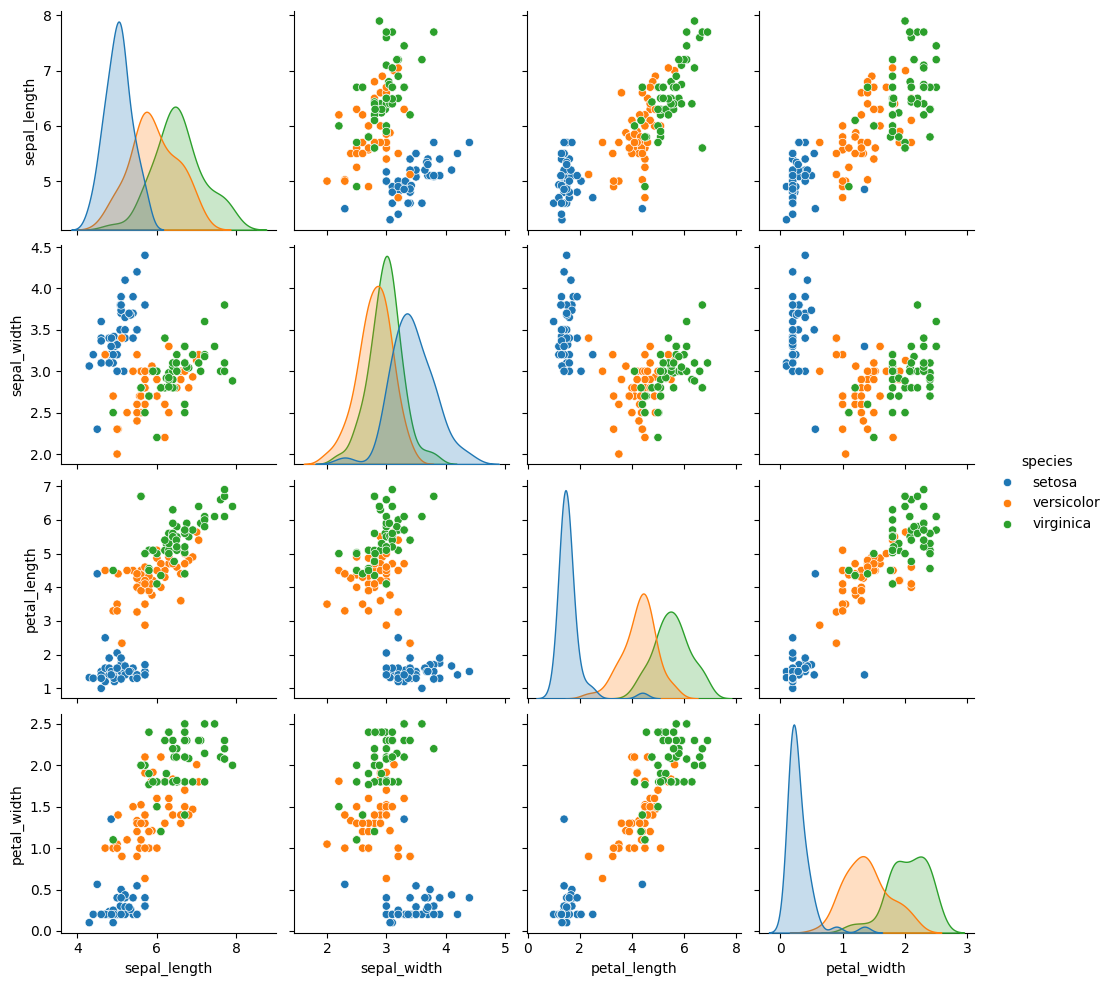

In [270]:
sns.pairplot(irisFinal, hue='species')

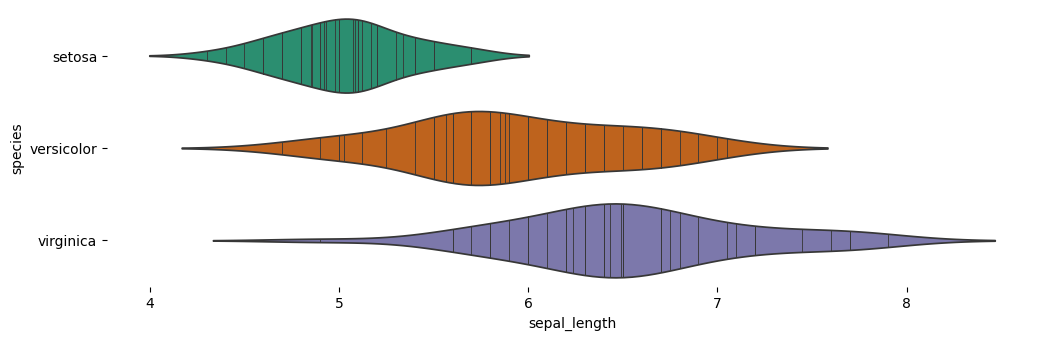

In [271]:
from matplotlib import pyplot as plt
figsize = (12, 1.2 * len(irisFinal['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(irisFinal, x='sepal_length', y='species', inner='stick', hue='species', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Eliminando amostras

Essa etapa deve ser feita sob forte justificativa. Notem que ao eliminar uma amostra estamos jogando fora toda a informação que foi coletada sobre ela.

Nesse exemplo, iremos remover apenas as linhas que possuem 3 nans, ou seja, fizemos a coleta de uma única característica. Nesse caso é argumentável que uma imputação poderia colocar essa amostra em um lugar indesejado, pois temos muito pouca informação (apenas uma entre 4)

In [311]:
iris = irisOriginalNa.copy()

#O comando isna() retorna um filtro indicando as células que possuem ou não valor NaN
iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
145,False,True,False,False,False
146,False,True,False,True,False
147,False,False,False,True,False
148,False,False,False,False,False


In [312]:
##Iremos contar a quantidade de valores True (i.e. NaN) na iris usando sum()
iris.isna().sum()

sepal_length    40
sepal_width     43
petal_length    41
petal_width     56
species          0
dtype: int64

Notem que ele fez a soma por colunas, indicando a quantidade de NaNs em cada coluna, mas não é isso que queremos, vamos especificar que queremos fazer **por linha** (axis=1)

In [313]:
iris.isna().sum(axis=1)

0      0
1      1
2      1
3      0
4      1
      ..
145    1
146    2
147    1
148    0
149    0
Length: 150, dtype: int64

Notem que ele da a contagem de NaNs em cada linha.

Vamos escolher os índices onde essa quantidade é >=3

In [314]:
#A linha abaixo retorna um filtro para nós
iris.isna().sum(axis=1) >= 3

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [315]:
#Vamos acessar apenas as linhas que atendem esse filtro
filtro = iris.isna().sum(axis=1) >= 3
iris[filtro]

,sepal_length,sepal_width,petal_length,petal_width,species
7,NaN,3.4,NaN,NaN,setosa
20,NaN,NaN,NaN,0.2,setosa
34,NaN,NaN,1.5,NaN,setosa
47,4.6,NaN,NaN,NaN,setosa
50,7.0,NaN,NaN,NaN,versicolor
53,NaN,NaN,NaN,NaN,versicolor
62,6.0,NaN,NaN,NaN,versicolor
81,5.5,NaN,NaN,NaN,versicolor
85,NaN,3.4,NaN,NaN,versicolor
92,NaN,NaN,NaN,1.2,versicolor


In [316]:
##recebendo lista com índices que tem muitos nans (e.g. [7,20,34,...,130])
toRemove = iris[filtro].index
print(toRemove)
print("Quantidade de amostras removidas: ",len(toRemove), '(',np.round((len(toRemove)/150)*100, 2),'%)')

Index([7, 20, 34, 47, 50, 53, 62, 81, 85, 92, 123, 127, 130], dtype='int64')
Quantidade de amostras removidas:  13 ( 8.67 %)


In [317]:
iris.drop(toRemove, axis=0, inplace=True)  #notem o axis, 0 agora representa por linhas, sempre verifiquem esse tipo de coisa antes de rodar o código pra valer!!
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,2.3,virginica
146,6.3,NaN,5.0,NaN,virginica
147,6.5,3.0,5.2,NaN,virginica
148,6.2,3.4,5.4,2.3,virginica


**Exercício:** Alterem o filtro de nans para remover as linhas com apenas 1 nan ou com 2 nans e vejam como a quantidade de linhas removidas aumenta. Agora reflitam sobre a probabilidade de ter ao menos um nan em uma amostra em uma base com muito mais atributos

In [318]:
##Por fim os índices estão de 0 a 149 com alguns elementos faltando. Isso pode ser útil ou ruim dependendo da aplicação
#Caso queiramos deixar os índices sem buracos
iris = iris.reset_index()
iris

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,NaN,3.0,1.4,0.2,setosa
2,2,4.7,3.2,NaN,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,NaN,1.4,0.2,setosa
...,...,...,...,...,...,...
132,145,6.7,NaN,5.2,2.3,virginica
133,146,6.3,NaN,5.0,NaN,virginica
134,147,6.5,3.0,5.2,NaN,virginica
135,148,6.2,3.4,5.4,2.3,virginica
